In [3]:
!pip install pandas
import pandas as pd

# Define the file path and name
file_path = r'D:\Fraud_Analytics\fa1\Payments.csv'

# Use pandas to read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Sender  Receiver  Amount
0    1309      1011  123051
1    1309      1011  118406
2    1309      1011  112456
3    1309      1011  120593
4    1309      1011  166396


In [4]:
import networkx as nx

# Assuming df is your DataFrame with columns 'Sender', 'Receiver', 'Amount'

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights
for _, row in df.iterrows():
    G.add_edge(row['Sender'], row['Receiver'], weight=row['Amount'])

# Now G is a weighted graph representing the transactions


In [15]:
# Assuming G is your graph

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"The graph has {num_nodes} nodes and {num_edges} edges.")

The graph has 799 nodes and 5358 edges.


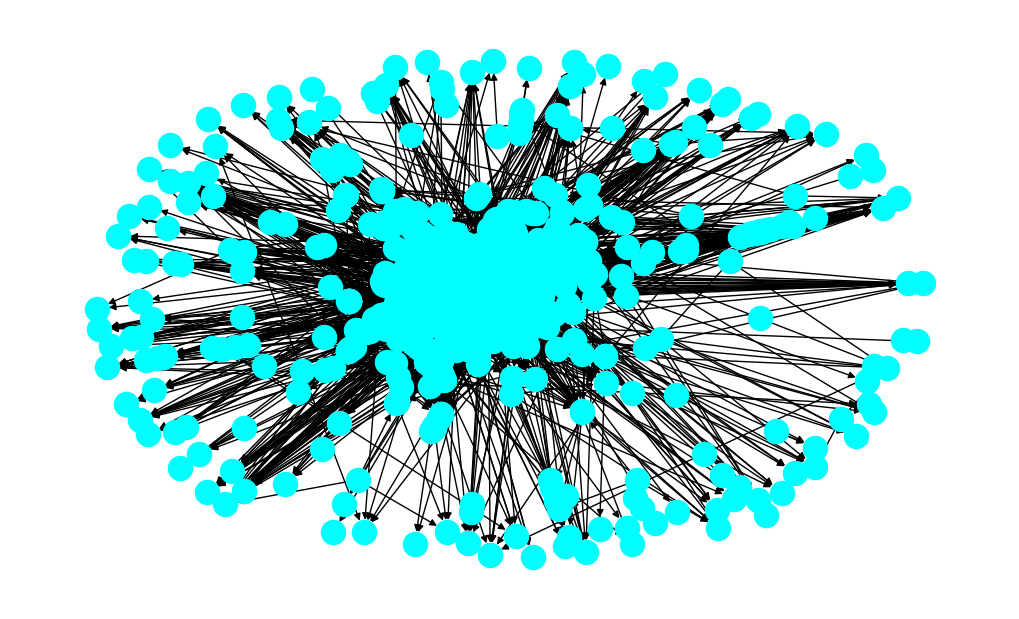

In [14]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(10,6))
nx.draw(G, with_labels=False, node_color='cyan')

plt.show()

  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 960.0 kB/s eta 0:00:10
   - -------------------------------------- 0.3/9.3 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.3 MB 6.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.3 MB 6.9 MB/s eta 0:00:02
   -------- ------------------------------- 1.9/9.3 MB 8.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.3 MB 8.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.7/9.3 MB 8.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.0/9.3 MB 8.4 MB/s eta 0:00:01
   -------------- ------------------------- 3.3/9.3 MB 7.7 MB/s eta 0:00:01
   --------------- ------------------------ 3.6/9.3 MB 7.7 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.3 MB 7.3 MB/s eta 0:00:01
   ----------------- ---

C:\Users\JP\AppData\Local\Temp\ipykernel_10596\1445220300.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  sparse_matrix = nx.adjacency_matrix(G)


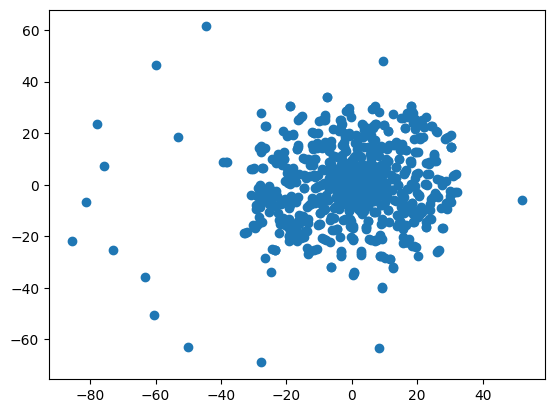

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Convert the graph to a sparse matrix
sparse_matrix = nx.adjacency_matrix(G)

# Use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(sparse_matrix.toarray())

# Plot the 2D points
x = transformed_data[:, 0]
y = transformed_data[:, 1]

plt.scatter(x, y)
plt.show()

In [7]:
print(G.nodes)

[1309, 1011, 1259, 1568, 1147, 1393, 1039, 1210, 1005, 1042, 1045, 1018, 1256, 1074, 1668, 1163, 1007, 1034, 1832, 1099, 1488, 1801, 1076, 1944, 1659, 1048, 1205, 1057, 1220, 1032, 1837, 1061, 1222, 1017, 1075, 1023, 2085, 1503, 2088, 1350, 1327, 1276, 1666, 1056, 1748, 1658, 1003, 1228, 1138, 1089, 1002, 1623, 1264, 1875, 1004, 1595, 1090, 1051, 1101, 1079, 1104, 1839, 1747, 1135, 1656, 1500, 1148, 1136, 1172, 1132, 1809, 1774, 1037, 1930, 2184, 1243, 1293, 1990, 1690, 1449, 1310, 1679, 1159, 1335, 1862, 1049, 1105, 1766, 1013, 1541, 1961, 1575, 1189, 1723, 1962, 1084, 1480, 2146, 1405, 1016, 1729, 2166, 2073, 1015, 1344, 1917, 1535, 1077, 1087, 1431, 1080, 1098, 1701, 1009, 1191, 1142, 1081, 1146, 1199, 1754, 1545, 1134, 1517, 1202, 1389, 1014, 1356, 1068, 1633, 1108, 1140, 1120, 1528, 1678, 1447, 1035, 1326, 1181, 1246, 1406, 1168, 1046, 1019, 1058, 1040, 1060, 1078, 1581, 1353, 1287, 1128, 1149, 1209, 1813, 1529, 2031, 1236, 1617, 1215, 1470, 1065, 1126, 1484, 1835, 1696, 1553, 158

In [9]:
from node2vec import Node2Vec

# Precompute probabilities and generate walks
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4,p=1,q=1)

# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get vector for a node
vector = model.wv# Replace '2' with your node

# Save model for later use
model.save("node2vec.model")

Computing transition probabilities: 100%|██████████| 799/799 [00:00<00:00, 2041.89it/s]


In [28]:
# Print embeddings for all nodes
for node in model.wv.index_to_key:
    embedding = model.wv[node]
    print(f"Node: {node}, Embedding: {embedding}")

Node: 1094, Embedding: [-0.3005734   0.15797953 -0.04887215  0.30046508 -0.46000198 -0.06195061
  0.35204417 -0.06599464 -0.39063156 -0.6290291   0.8035802  -0.6185667
 -0.41256943  0.58073217  0.19245599  0.08539242 -0.58288926 -0.37730193
  0.19776943  0.3575583   0.74639124  0.43500656  0.81163067 -0.21293108
  0.02671668  0.3859339   0.21685429  0.011176    0.03874291 -0.2227152
 -0.15389463 -0.30990613  0.20303527 -0.6271898  -0.18420136  0.17218533
  0.13098039 -0.01692699 -0.06126548 -0.13518152  0.04059153  0.08298568
 -0.52791256 -0.12210962  0.1908318  -0.7775743  -0.45918876 -0.45789248
  0.43413046  0.57524014 -0.1721217  -0.03880883  0.79162395  0.83834743
  0.2384773  -0.11051118  0.0467414  -0.38907075  0.54096955  0.24245614
 -0.8367245   0.49251327 -0.11415355 -0.05488086]
Node: 1122, Embedding: [-0.23825385  0.18643118 -0.16881934  0.3872048  -0.39106205 -0.06913081
  0.31806666 -0.1130736  -0.39640796 -0.5811281   0.85277444 -0.6004814
 -0.3956513   0.61495453  0.260

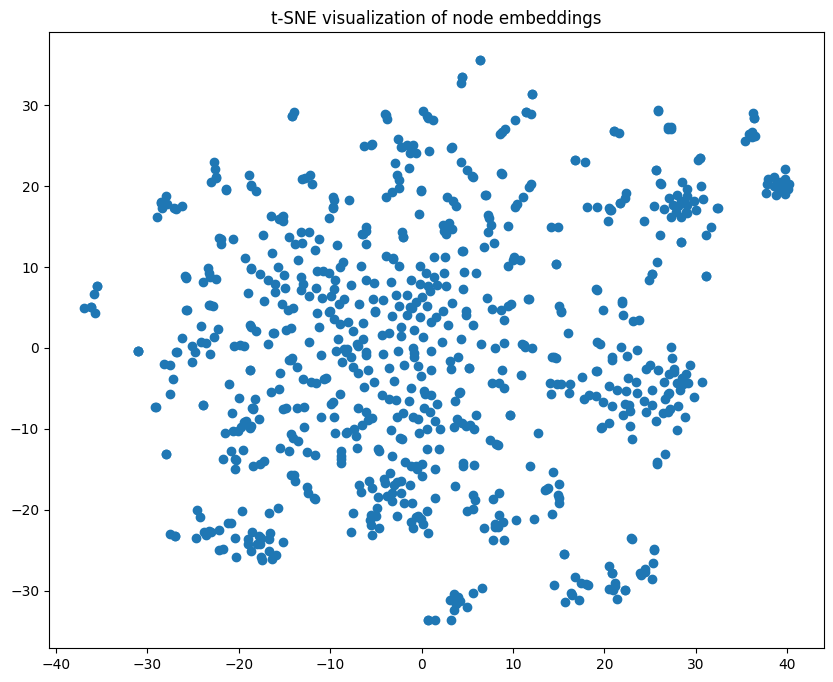

In [30]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get all node embeddings
embeddings = [model.wv[node] for node in model.wv.index_to_key]

# Convert list of embeddings to numpy array
embeddings = np.array(embeddings)

# Apply t-SNE transformation
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the transformed embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title('t-SNE visualization of node embeddings')
plt.show()

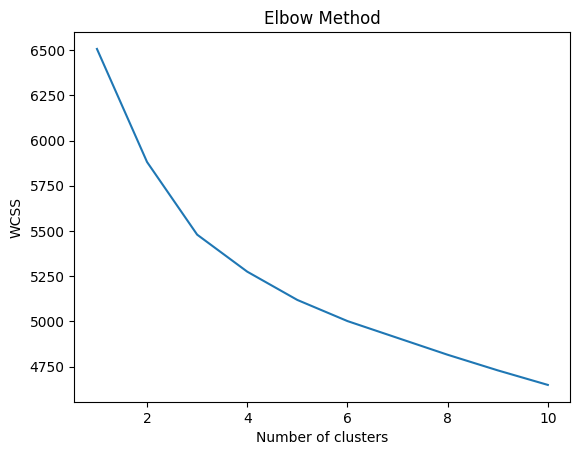

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'vector' is your data
data = vector.vectors

wcss = []
max_clusters = 10  # Change this to the maximum number of clusters you want to try

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
from sklearn.cluster import KMeans

# Get all vectors into a list
vectors = [model.wv[str(node)] for node in G.nodes]

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the algorithm to the data
kmeans.fit(vectors)

# Get the cluster assignments for each node
clusters = kmeans.labels_

# Print the cluster assignments
print(clusters)

[1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1
 1 1 1 1 1 2 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 2 0 1 2 2 2 2 0 2
 2 0 1 0 1 2 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 2 1 1 2
 2 0 1 0 1 1 1 1 1 1 1 0 

c:\Users\JP\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
import numpy as np

# Get unique cluster labels and their counts
unique_clusters, counts = np.unique(clusters, return_counts=True)

# Print the number of clusters
print(f'Number of clusters: {len(unique_clusters)}')

# Print the number of nodes each cluster has
for cluster, count in zip(unique_clusters, counts):
    print(f'Cluster {cluster} has {count} nodes')

Number of clusters: 3
Cluster 0 has 110 nodes
Cluster 1 has 586 nodes
Cluster 2 has 103 nodes


In [32]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming 'data' is your data and 'clusters' are your cluster labels
silhouette_avg = silhouette_score(embeddings, clusters)
db_score = davies_bouldin_score(embeddings, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {db_score}')

Silhouette Score: 0.0005527733010239899
Davies-Bouldin Score: 13.532446654364522


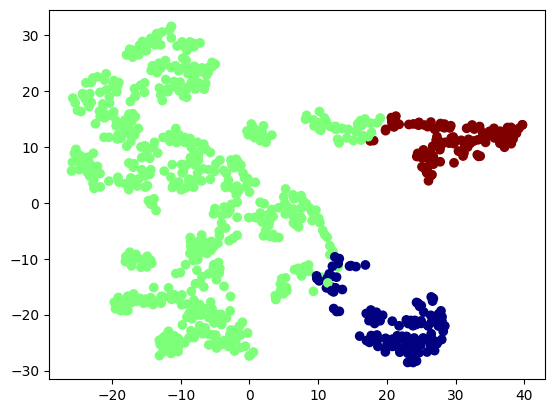

In [31]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Get all vectors into a list
vectors = [model.wv[str(node)] for node in G.nodes]



# Use t-SNE to reduce dimensionality to 2
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(vectors_pca)

# Create a color map based on cluster assignments
color_map = [kmeans.predict([vector])[0] for vector in vectors]

# Plot the nodes using t-SNE
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], c=color_map, cmap=plt.cm.jet)
plt.show()

c:\Users\JP\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


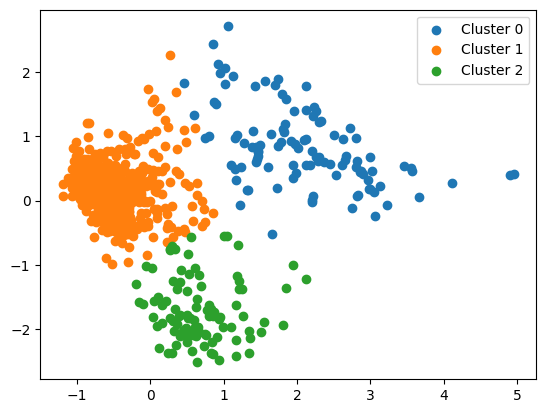

In [33]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Get all vectors into a list
vectors = [model.wv[str(node)] for node in G.nodes]

# Use PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

# Perform KMeans clustering on the reduced data
kmeans = KMeans(n_clusters=3)
kmeans.fit(vectors_pca)

# Create a color map based on cluster assignments
color_map = kmeans.labels_

# Get unique clusters
unique_clusters = np.unique(color_map)

# Plot each cluster as a separate scatter plot
fig, ax = plt.subplots()
for cluster in unique_clusters:
    ix = np.where(color_map == cluster)
    ax.scatter(vectors_pca[ix, 0], vectors_pca[ix, 1], label = f'Cluster {cluster}')
ax.legend()
plt.show()